# Homework 02 - Exploratory Data Analysis in Python
## Author: Sanjay Bhargav Siddi

## 1. Using data transformation to correct non-normality in numerical data
####     a) Load and explore a data set with publication quality tables
####     b) Quickly diagnose non-normality in data
####     c) Data transformation

### 1.1. Required Setup 

In [1]:
# Import all required libraries
# Data analysis and manipulation
import pandas as pd
# Working with arrays
import numpy as np
# Statistical visualization
import seaborn as sns
# Matlab plotting for Python
import matplotlib.pyplot as plt
# Data analysis
import statistics as stat
# Predictive data analysis: process data 
from sklearn import preprocessing as pproc
import scipy.stats as stats
# Visualizing missing values
import missingno as msno
# Statistical modeling
import statsmodels.api as sm

# Increase font size of all seaborn plot elements
sns.set(font_scale = 1.5, rc = {'figure.figsize':(8, 8)})

# Change theme to "white"
sns.set_style("white")

### 1.2 Loading a data set 

In [2]:
tornadosData = pd.read_csv('C:/Users/sanja/OneDrive/Desktop/University of Arizona Classes/INFO 523 - Data Mining/HW/hw-02-SanjaySiddi/data/tornados.csv')

### 1.3 Examining the data set and trimming the data

In [3]:
tornadosData.describe()

,om,yr,mo,dy,stf,mag,inj,fat,loss,slat,...,elat,elon,len,wid,ns,sn,f1,f2,f3,f4
count,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,67937.000000,68693.000000,68693.00000,4.152300e+04,68693.000000,...,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000,68693.000000
mean,113201.815542,1991.854061,5.968541,15.930881,29.220255,0.778721,1.418689,0.08931,2.020898e+06,37.129386,...,22.960651,-56.836090,3.489270,107.767633,1.008764,0.991411,104.643952,8.605142,1.687202,0.506791
std,226621.993899,19.565158,2.444656,8.750070,15.013273,0.895790,18.114752,1.47212,3.039588e+07,5.099005,...,18.528144,45.340732,8.247115,206.851267,0.095060,0.092278,96.750296,38.106019,16.681665,9.163194
min,1.000000,1950.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,5.000000e+01,17.721200,...,0.000000,-163.530000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.000000,1976.000000,4.000000,8.000000,18.000000,0.000000,0.000000,0.00000,1.000000e+04,33.180000,...,0.000000,-94.780000,0.120000,20.000000,1.000000,1.000000,37.000000,0.000000,0.000000,0.000000
50%,588.000000,1995.000000,6.000000,16.000000,28.000000,1.000000,0.000000,0.00000,5.000000e+04,37.000000,...,32.550000,-84.720000,0.800000,50.000000,1.000000,1.000000,85.000000,0.000000,0.000000,0.000000
75%,1118.000000,2008.000000,7.000000,24.000000,42.000000,1.000000,0.000000,0.00000,5.000000e+05,40.920000,...,38.650000,0.000000,3.210000,100.000000,1.000000,1.000000,137.000000,0.000000,0.000000,0.000000
max,622080.000000,2022.000000,12.000000,31.000000,78.000000,5.000000,1740.000000,158.00000,2.800100e+09,61.020000,...,61.020000,0.000000,234.700000,4576.000000,3.000000,1.000000,810.000000,820.000000,710.000000,507.000000


In [4]:
tornadosData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68693 entries, 0 to 68692
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   om            68693 non-null  int64  
 1   yr            68693 non-null  int64  
 2   mo            68693 non-null  int64  
 3   dy            68693 non-null  int64  
 4   date          68693 non-null  object 
 5   time          68693 non-null  object 
 6   tz            68693 non-null  object 
 7   datetime_utc  68693 non-null  object 
 8   st            68693 non-null  object 
 9   stf           68693 non-null  int64  
 10  mag           67937 non-null  float64
 11  inj           68693 non-null  int64  
 12  fat           68693 non-null  int64  
 13  loss          41523 non-null  float64
 14  slat          68693 non-null  float64
 15  slon          68693 non-null  float64
 16  elat          68693 non-null  float64
 17  elon          68693 non-null  float64
 18  len           68693 non-nu

In [5]:
# creating a copy of the tornados data set
data = tornadosData.copy()

# renaming columns for readability
data = data.rename(columns={'om':'Tornado ID','yr':'Year','mo':'Month','dy':'Day','date':'Date','time':'Time','tz':'Timezone','st':'State','mag':'Magnitude','inj':'Injuries','fat':'Fatality','loss':'Loss','len':'Length','wid':'Width','ns':'States Affected'})

# removing non-important columns 
data = data.drop(columns=['datetime_utc','stf','slat','slon','elat','elon','f1','f2','f3','f4','sn','fc'])

# filling NaN with 0
data = data.fillna(0)

##### Original Data Set 

In [6]:
tornadosData.head()

,om,yr,mo,dy,date,time,tz,datetime_utc,st,stf,...,elon,len,wid,ns,sn,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,1950-10-02T03:00:00Z,OK,40,...,-102.3,15.8,10,1,1,25,0,0,0,False
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,1950-10-09T08:15:00Z,NC,37,...,0.0,2.0,880,1,1,47,0,0,0,False
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,1950-11-20T08:20:00Z,KY,21,...,0.0,0.1,10,1,1,177,0,0,0,False
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,1950-11-20T10:00:00Z,KY,21,...,0.0,0.1,10,1,1,209,0,0,0,False
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,1950-11-20T13:30:00Z,MS,28,...,0.0,2.0,37,1,1,101,0,0,0,False


##### Trimmed Data Set 

In [7]:
data.head()
# Tornado ID = Tornado number. Effectively an ID for this tornado in this year.
# States Affected = Number of states affected by this tornado. 1, 2, or 3.

,Tornado ID,Year,Month,Day,Date,Time,Timezone,State,Magnitude,Injuries,Fatality,Loss,Length,Width,States Affected
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,OK,1.0,0,0,50000.0,15.8,10,1
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,NC,3.0,3,0,500000.0,2.0,880,1
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,KY,2.0,0,0,500000.0,0.1,10,1
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,KY,1.0,0,0,500000.0,0.1,10,1
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,MS,1.0,3,0,50000.0,2.0,37,1


##### Creating a sub group 

In [8]:
def loss_group_data(data): 
  if data.Loss >= 0 and data.Loss <= 1000: return "Low loss"
  elif data.Loss > 1000 and data.Loss <= 100000: return "Medium loss" 
  else: return "Huge loss"

# Apply the function to data
data['Loss_group'] = data.apply(loss_group_data, axis = 1)

# What does the data look like
data.head(1000)

,Tornado ID,Year,Month,Day,Date,Time,Timezone,State,Magnitude,Injuries,Fatality,Loss,Length,Width,States Affected,Loss_group
0,192,1950,10,1,1950-10-01,21:00:00,America/Chicago,OK,1.0,0,0,50000.0,15.8,10,1,Medium loss
1,193,1950,10,9,1950-10-09,02:15:00,America/Chicago,NC,3.0,3,0,500000.0,2.0,880,1,Huge loss
2,195,1950,11,20,1950-11-20,02:20:00,America/Chicago,KY,2.0,0,0,500000.0,0.1,10,1,Huge loss
3,196,1950,11,20,1950-11-20,04:00:00,America/Chicago,KY,1.0,0,0,500000.0,0.1,10,1,Huge loss
4,197,1950,11,20,1950-11-20,07:30:00,America/Chicago,MS,1.0,3,0,50000.0,2.0,37,1,Medium loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,216,1953,6,4,1953-06-04,15:00:00,America/Chicago,FL,1.0,0,0,50.0,0.1,10,1,Low loss
996,217,1953,6,5,1953-06-05,08:45:00,America/Chicago,FL,0.0,0,0,50.0,0.1,10,1,Low loss
997,218,1953,6,5,1953-06-05,10:00:00,America/Chicago,UT,0.0,0,0,0.0,8.0,147,1,Low loss
998,219,1953,6,5,1953-06-05,13:30:00,America/Chicago,TX,0.0,0,0,0.0,0.1,10,1,Low loss


### 1.4. Describing Properties of our Data (Refined)
#### Measures of describing the shape of a distribution, usually compared to a normal distribution (bell-curve)
#### Skewness: The symmetry of the distribution
#### Kurtosis: The tailedness of the distribution

In [9]:
# Make a copy of the data 
dataCopy = data.copy()

# Select only numerical columns
dataRed = dataCopy.select_dtypes(include = np.number)

# List of numerical columns
dataRedColsList = dataRed.columns[...]

# For all values in the numerical column list from above
for i_col in dataRedColsList:
  # List of the values in i_col
  dataRed_i = dataRed.loc[:,i_col]
  
  # Skewness: The symmetry of the distribution
  skewness = round((dataRed_i.skew()), 3) 
  
  # Kurtosis: The tailedness of the distribution
  kurtosis = round((dataRed_i.kurt()), 3)
  
  # Print a blank row
  print('')
  
  # Print the column name
  print(i_col)
  
  # Print skewness and kurtosis
  print('skewness =', skewness, 'kurtosis =', kurtosis)


Tornado ID
skewness = 1.598 kurtosis = 0.693

Year
skewness = -0.317 kurtosis = -1.001

Month
skewness = 0.536 kurtosis = 0.032

Day
skewness = -0.011 kurtosis = -1.197

Magnitude
skewness = 1.136 kurtosis = 1.076

Injuries
skewness = 45.494 kurtosis = 3063.365

Fatality
skewness = 50.365 kurtosis = 3758.323

Loss
skewness = 67.02 kurtosis = 6102.314

Length
skewness = 7.415 kurtosis = 95.365

Width
skewness = 5.479 kurtosis = 46.394

States Affected
skewness = 11.146 kurtosis = 130.128


### 1.5.  Testing Normality

##### Testing overall normality of numerical columns

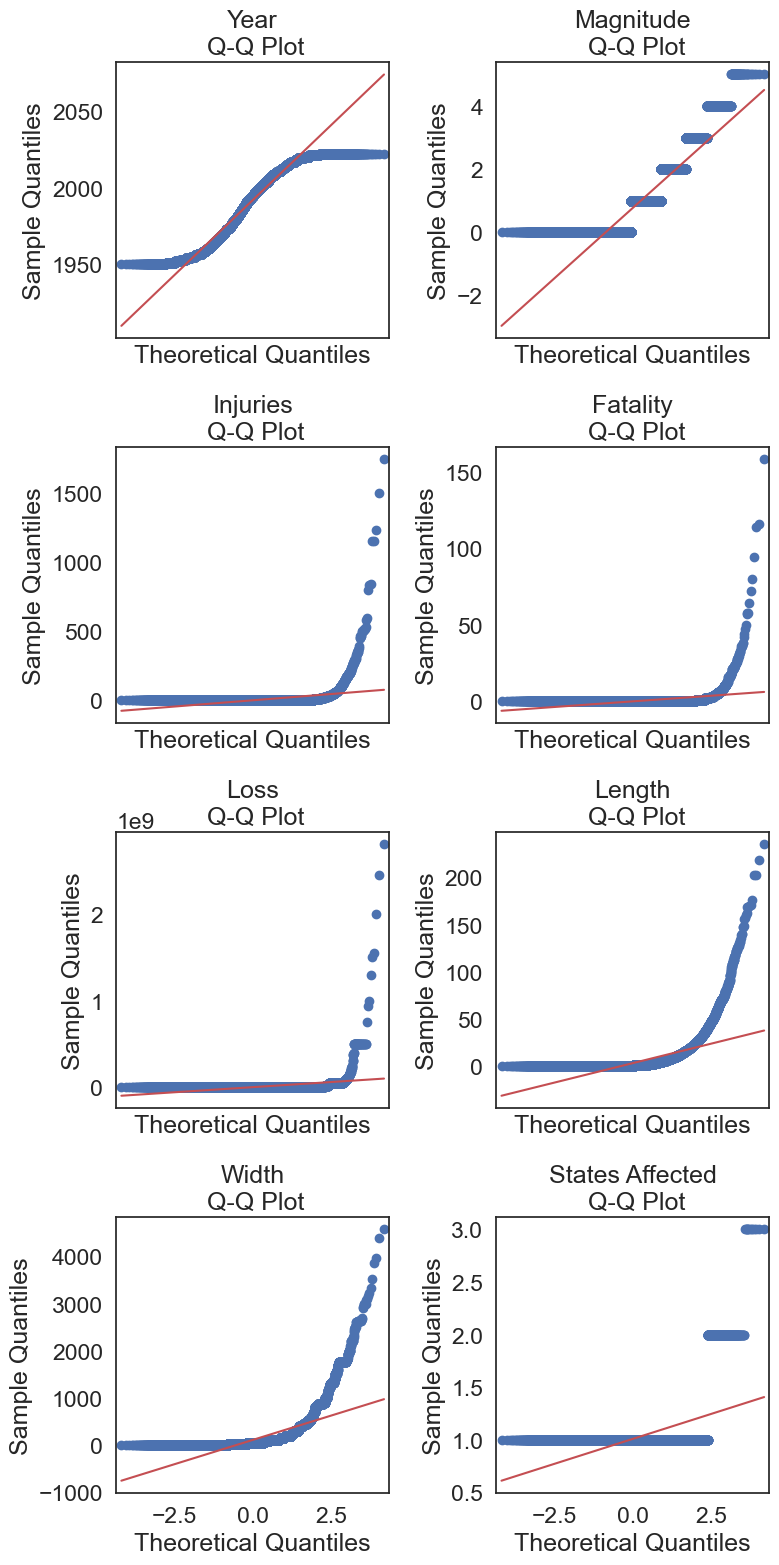

In [10]:
# Make a copy of the data 
dataCopy = data.copy()

# Remove NAs
dataCopyFin = dataCopy.dropna()

# Removing unnecessary columns for QQ plot
dataCopyFin1 = dataCopyFin.drop(columns=['Tornado ID','Month','Day',])

# Select only numerical columns
dataRed = dataCopyFin1.select_dtypes(include = np.number)

# Combine multiple plots, the number of columns and rows is derived from the number of numerical columns from above. 
fig, axes = plt.subplots(ncols = 2, nrows = 4, sharex = True, figsize = (2 * 4, 4 * 4))

# Generate figures for all numerical grouped data subsets
for k, ax in zip(dataRed.columns, np.ravel(axes)):
    sm.qqplot(dataRed[k], line = 's', ax = ax)
    ax.set_title(f'{k}\n Q-Q Plot')
plt.tight_layout()
plt.show()

#### Magnitude Q-Q Plot  - light tailed, right skewed
#### Injuries Q-Q Plot - right skewed, heavy tailed, can observe a spike in the values with a spread from around 750
#### Fatality Q-Q Plot - right skewed, heavy tailed, can observe a spike in the values, can observe a gap from around 110 
#### Loss Q-Q Plot - right skewed, heavy tailed, can observe a spike in the values with a spread 
#### Length Q-Q Plot - right skewed, heavy tailed, observed a sudden spike in the values
#### Width Q-Q Plot - right skewed, heavy tailed, observed a spike in the values similar to that of lenght qq plot
#### States Affected Q-Q Plot - right skewed, heavy tailed, huge gap in the values


##### Testing normality of groups 

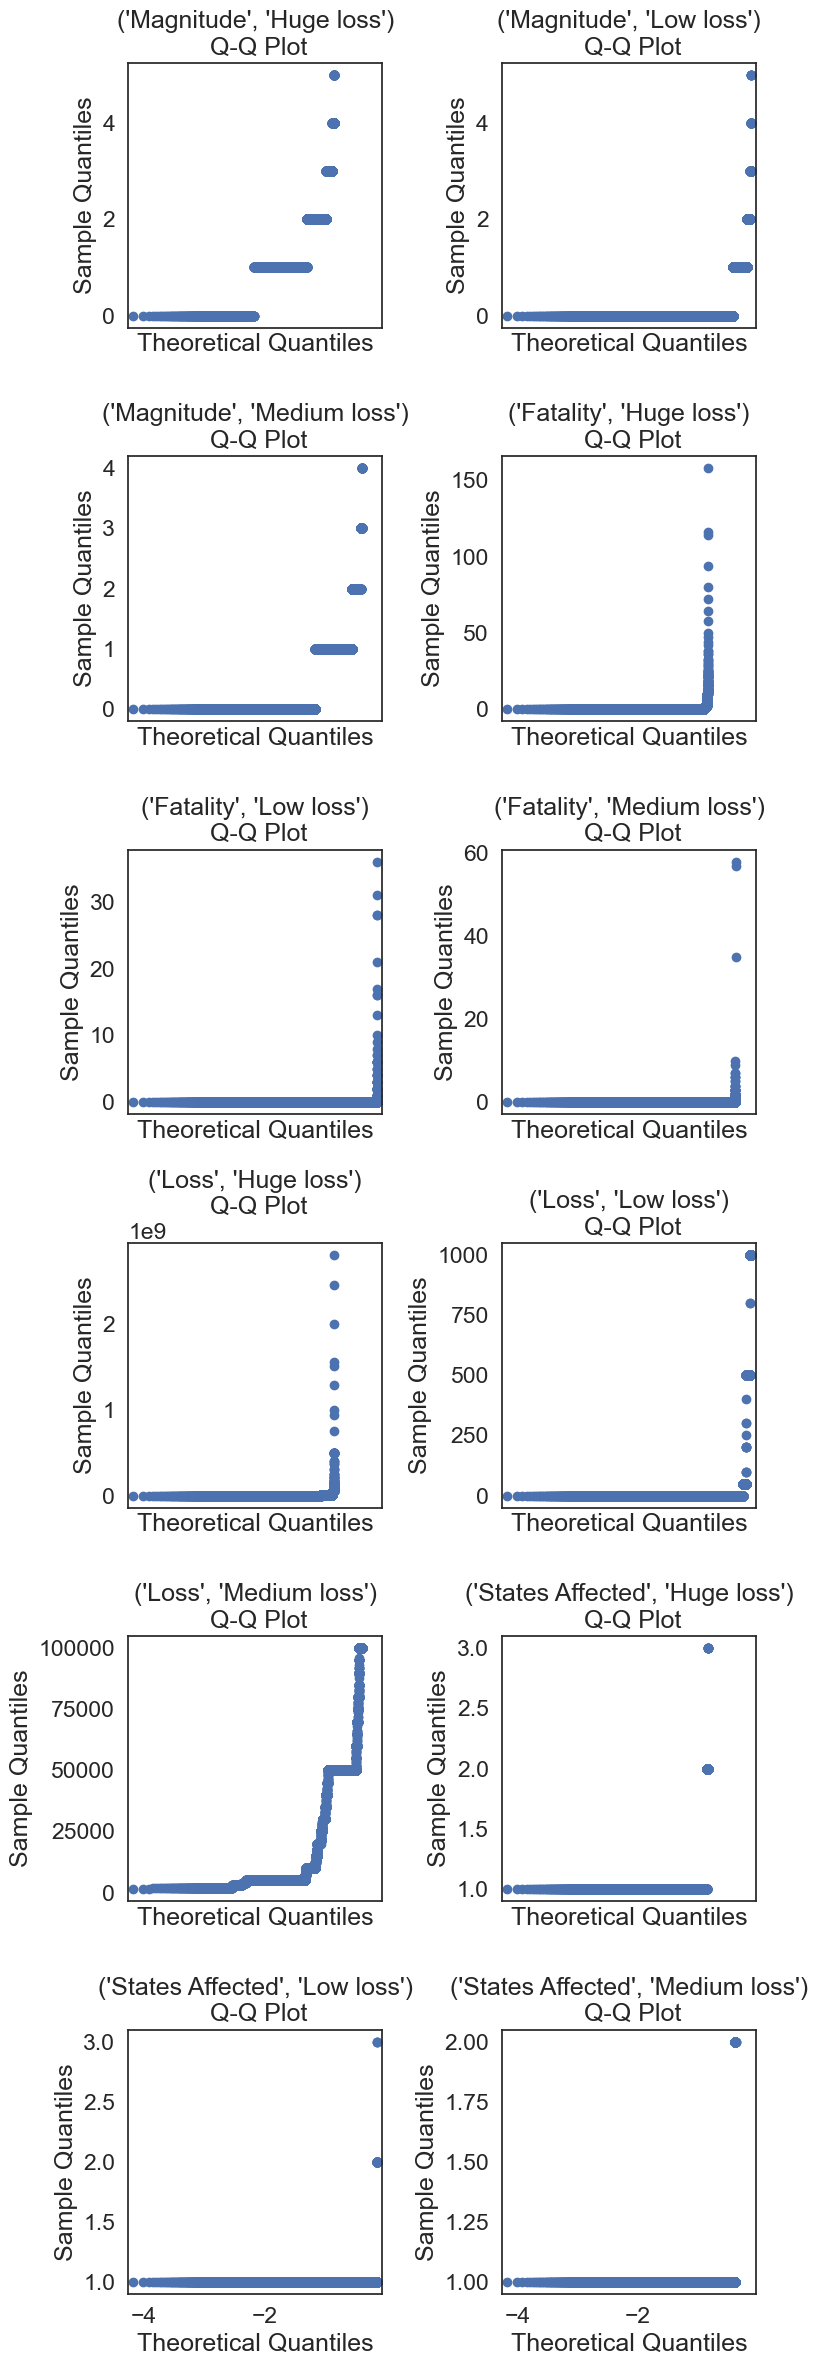

In [11]:
# Make a copy of the data 
dataCopy = data.copy()

# Remove NAs
dataCopyFin = dataCopy.dropna()

# Create a new column named in x, which is filled with the dataset rownames
dataCopyFin.index.name = 'Index'

# Reset the rownames index (not a column)
dataCopyFin.reset_index(inplace = True)

# Pivot the data from long-to-wide with pivot, using Date as the index, so that a column is created for each Group and numerical column subset
dataPivot = dataCopyFin.pivot(index = 'Index', columns = 'Loss_group', values = ['Magnitude', 'Fatality', 'Loss', 'States Affected'])

# Select only numerical columns
dataRed = dataPivot.select_dtypes(include = np.number)

# Combine multiple plots, the number of columns and rows is derived from the number of numerical columns from above. 
fig, axes = plt.subplots(ncols = 2, nrows = 6, sharex = True, figsize = (2 * 4, 6 * 4))

# Generate figures for all numerical grouped data subsets
for k, ax in zip(dataRed.columns, np.ravel(axes)):
    sm.qqplot(dataRed[k], line = 's', ax = ax)
    ax.set_title(f'{k}\n Q-Q Plot')
plt.tight_layout()
plt.show()

####  Magnitude, Huge loss Q-Q Plot : right skewed, observed gaps  in quantiles
####  Magnitude, Low loss Q-Q Plot : right skewed, observed gaps in quantiles
#### Magnitude, Medium loss Q-Q Plot : right skewed, observed gaps in quantiles
#### Fatality, Huge loss Q-Q Plot : right skewed, sudden rise
#### Fatality, Low loss Q-Q Plot : right skewed
#### Fatality, Medium loss Q-Q Plot : right skewed, gaps in quantiles
#### Loss, Huge loss Q-Q Plot : right skewed, gaps in quantiles
#### Loss, Low loss Q-Q Plot : right skewed, gaps in quantiles
#### Loss, Medium loss Q-Q Plot : right skewed, heavy tailed
#### States Affected, Huge loss Q-Q Plot : discrete data, right skewed

### 1.6. Transforming Data

In [12]:
# Filter magnitude greater than 0
Mag = data[data.Magnitude > 0]

# Select only Magnitude
MagMod = Mag.filter(["Magnitude"], axis = "columns")

#### Square-root Transformation 

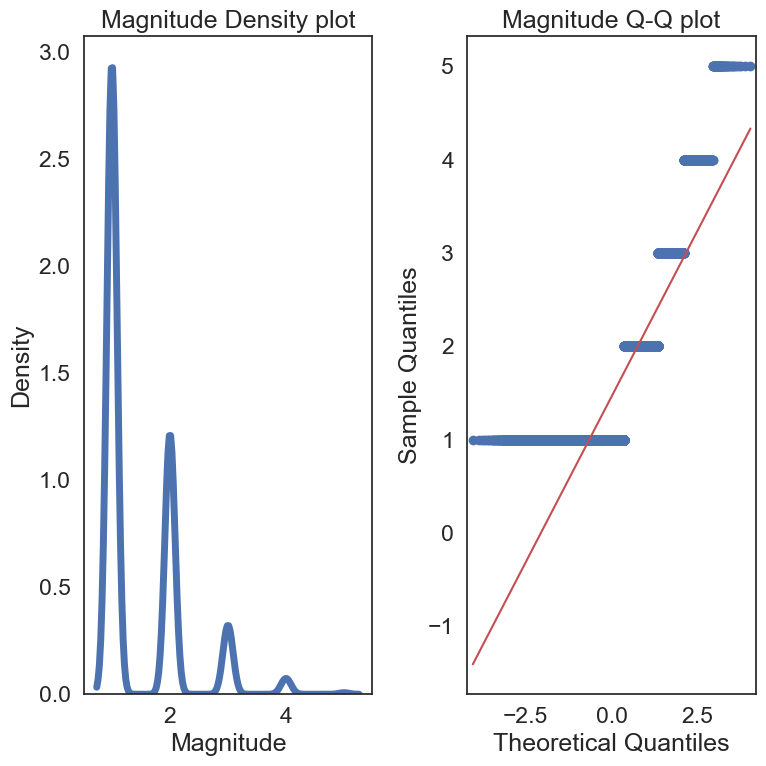

In [13]:
# Square-root transform the data in a new column
MagMod['Mag_Sqrt'] = np.sqrt(MagMod['Magnitude'])

# Specify desired column
col = MagMod.Magnitude

# Specify desired column
i_col = MagMod.Mag_Sqrt

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('Magnitude Density plot')    

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('Magnitude Q-Q plot')    
plt.tight_layout()
plt.show()

#### Magnitude density plot - Right skewed, multimodal distributions
#### Magnitude Q-Q plot - right skewed, with gaps

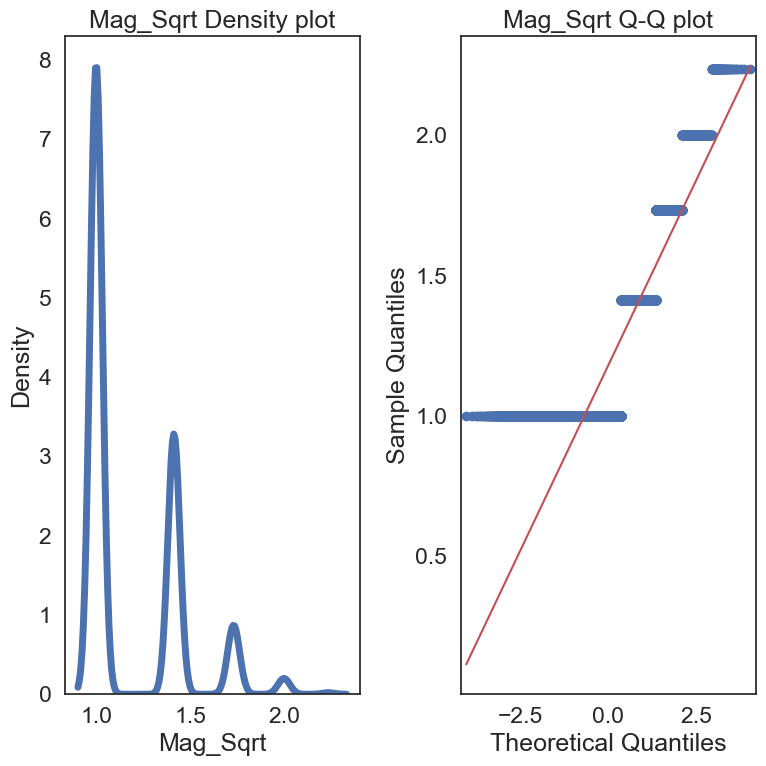

In [14]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Mag_Sqrt Density plot')   

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Mag_Sqrt Q-Q plot') 
plt.tight_layout()
plt.show()

#### Magnitude square root density plot - multimodal distribution, right skewed
#### Magnitude square root QQ plot - right skewed, with gaps

##### Logarithmic (+1) Transformation 

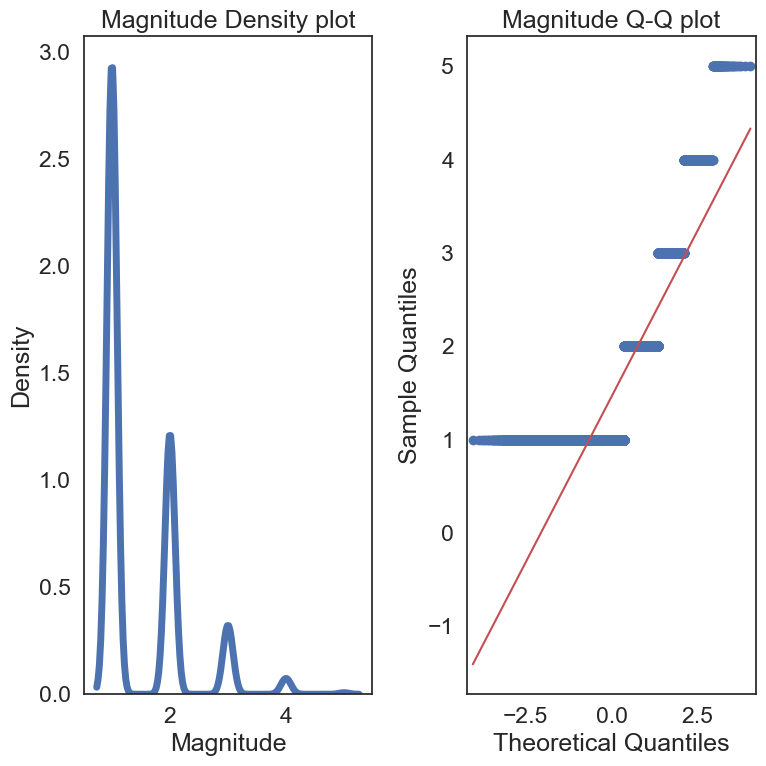

In [15]:
# Logarithmic transform the data in a new column
MagMod['Mag_Log'] = np.log(MagMod['Magnitude'] + 1)

# Specify desired column
col = MagMod.Magnitude

# Specify desired column
i_col = MagMod.Mag_Log

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('Magnitude Density plot')    

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('Magnitude Q-Q plot')    
plt.tight_layout()
plt.show()

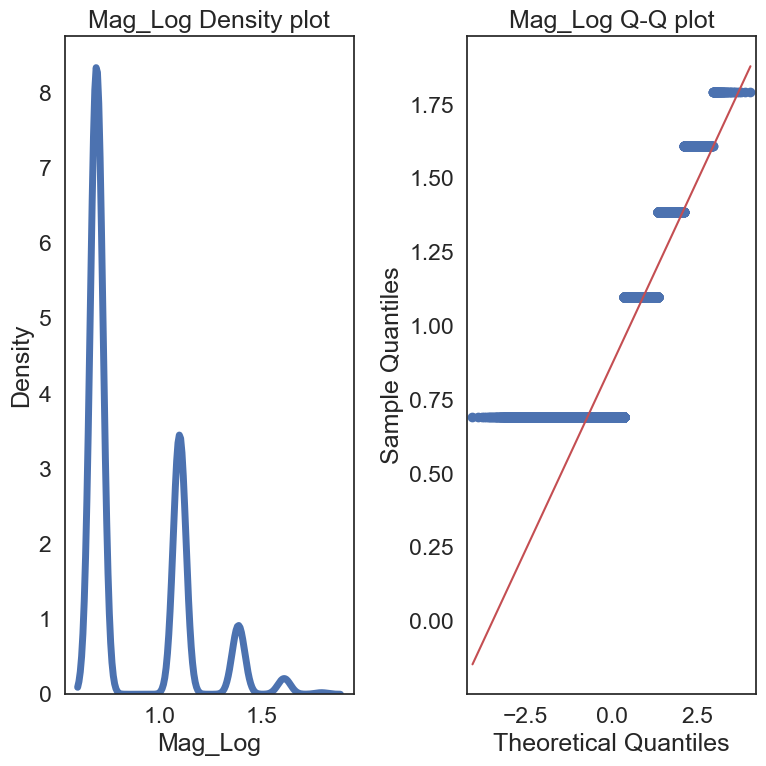

In [16]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Mag_Log Density plot')   

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Mag_Log Q-Q plot') 
plt.tight_layout()
plt.show()

#### Magnitude log density plot - Right skewed, multimodal distributions
#### Magnitude log Q-Q plot - Left skewed, with gaps

##### Inverse Transformation 

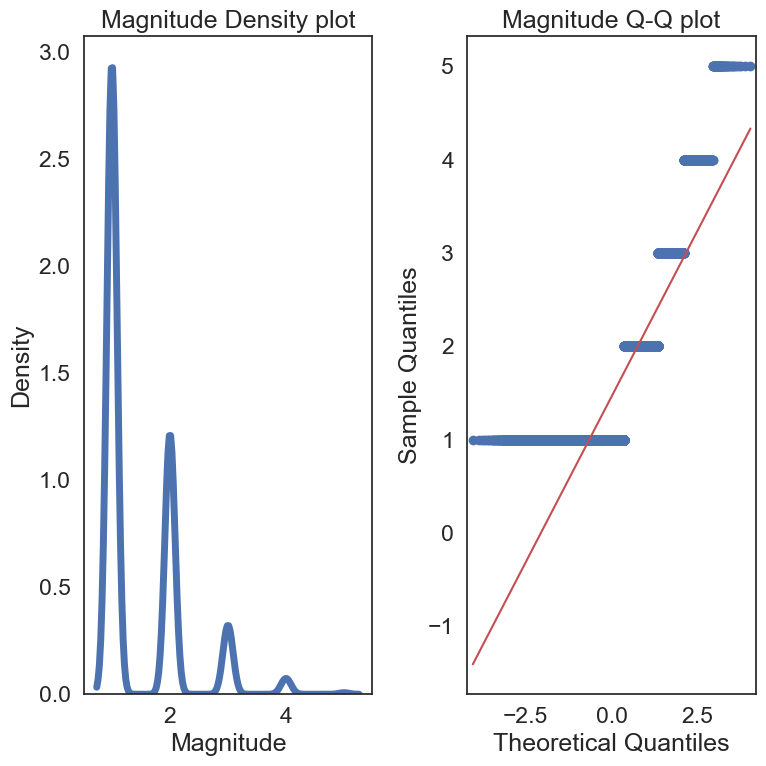

In [17]:
# Inverse transform the data in a new column
MagMod['Mag_Inv'] = 1/MagMod.Magnitude

# Specify desired column
col = MagMod.Magnitude

# Specify desired column
i_col = MagMod.Mag_Inv

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('Magnitude Density plot')    

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('Magnitude Q-Q plot')    
plt.tight_layout()
plt.show()

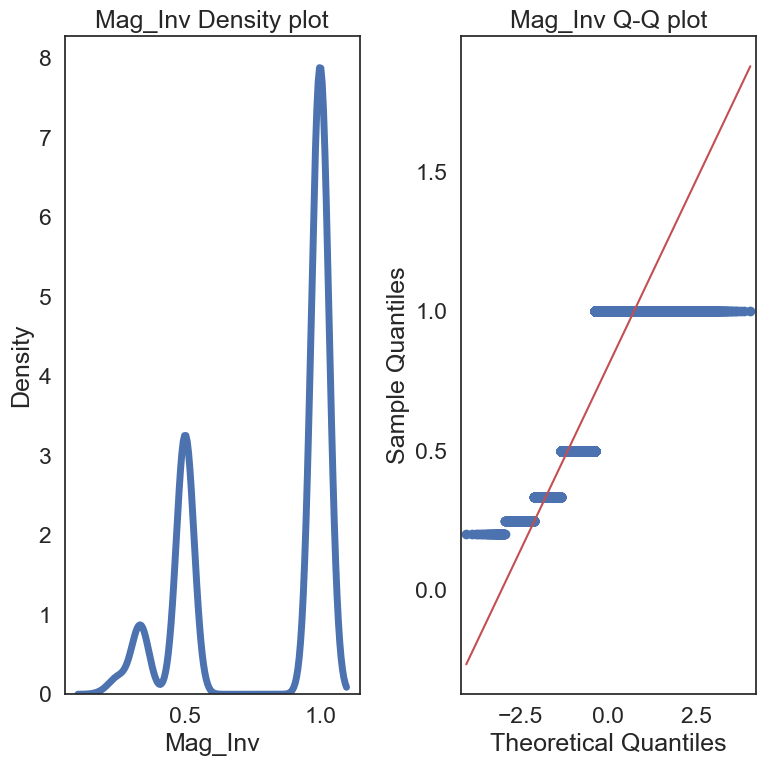

In [18]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Mag_Inv Density plot')   

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Mag_Inv Q-Q plot') 
plt.tight_layout()
plt.show()

#### Magnitude inverse density plot - Left skewed, multimodal distributions (3)
#### Magnitude inverse Q-Q plot - Right skewed, with gaps

#### Box-Con Transformation 

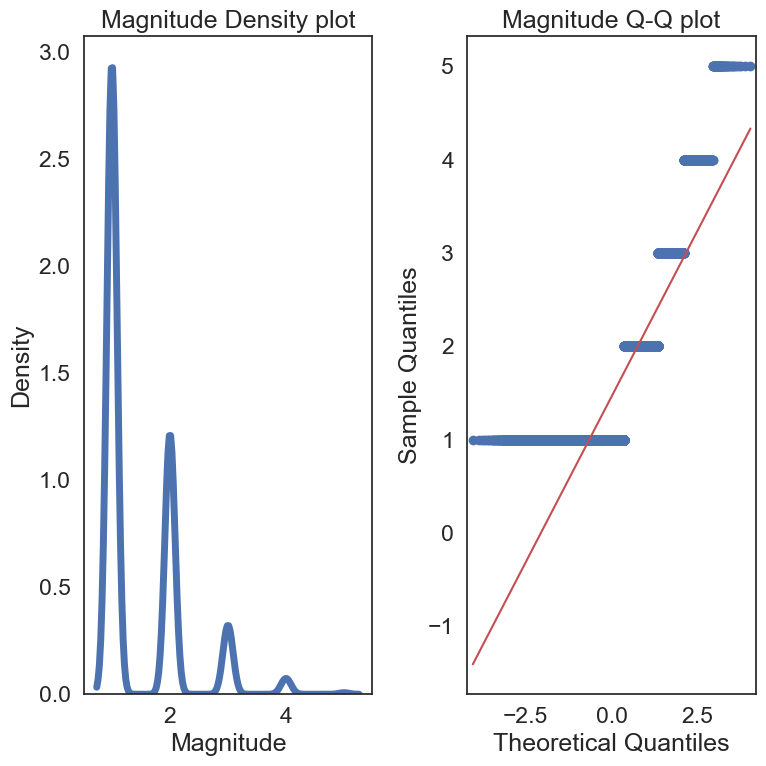

In [19]:
# Box-cox transform the data in a new column
MagMod['Mag_Boxcox'], parameters = stats.boxcox(MagMod['Magnitude'])

# Specify desired column
col = MagMod.Magnitude

# Specify desired column
i_col = MagMod.Mag_Boxcox

# ORIGINAL
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(col, linewidth = 5, ax = ax1)
ax1.set_title('Magnitude Density plot')    

# Q-Q plot
sm.qqplot(col, line='s', ax = ax2)
ax2.set_title('Magnitude Q-Q plot')    
plt.tight_layout()
plt.show()

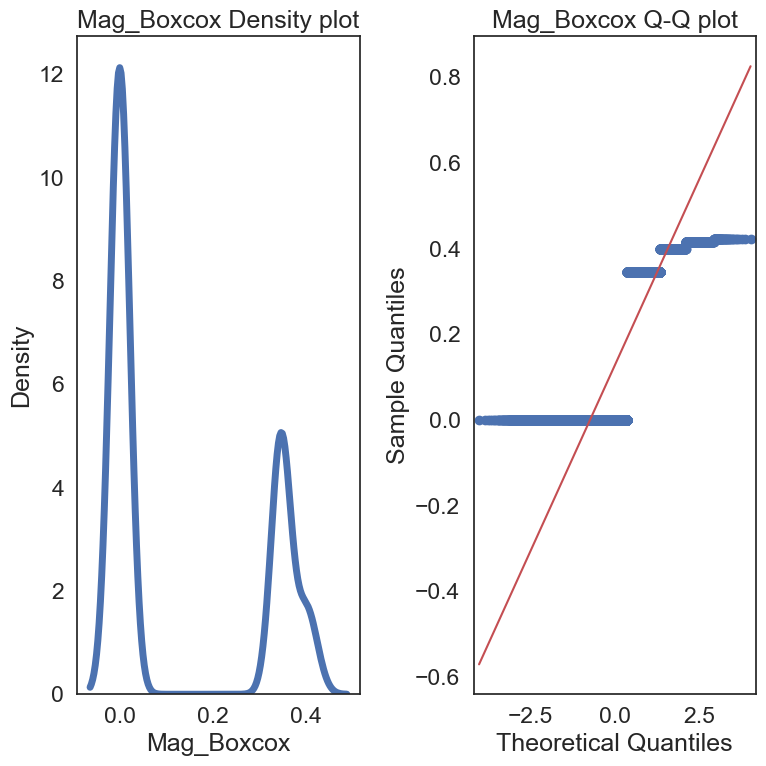

In [20]:
# TRANSFORMED
# Subplots
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1)

# Density plot
sns.kdeplot(i_col, linewidth = 5, ax = ax1)
ax1.set_title('Mag_Boxcox Density plot')   

# Q-Q plot
sm.qqplot(i_col, line='s', ax = ax2)
ax2.set_title('Mag_Boxcox Q-Q plot') 
plt.tight_layout()
plt.show()

#### Magnitude Boxcon density plot - right skewed, bimodal distribution
#### Magnitude Boxcon QQ plot - left skewed, bimodal